1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

Egienvalues with Eigendecomposition:
 [2.69411547e+01 1.93445770e+00 2.43430995e-16]
Egienvalues with SVD:
 [2.69715363e+01 1.93475686e+00 2.08554699e-31]
Eigenvectors with Eigendecomposition:
 [[-0.11091012 -0.81649658  0.5665971 ]
 [-0.80484702  0.40824829  0.4307605 ]
 [-0.58302678 -0.40824829 -0.7024337 ]]
Eigenvectors with SVD:
 [[-0.11084185  0.56661046 -0.81649658]
 [-0.58311141 -0.70236345 -0.40824829]
 [-0.80479511  0.43085748  0.40824829]]

By selecting the component 0, we retain 93.30% of the total variability
By selecting the component 1, we retain 6.70% of the total variability
By selecting the component 2, we retain 0.00% of the total variability
By reducing the dimensionality of the system, we retain 100.00% of the total variability


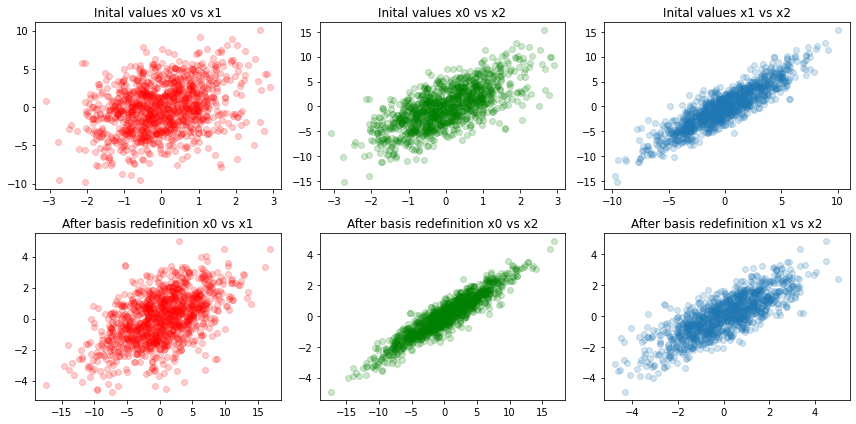

In [2]:
N = 1100
mu = 0
s_1 = 1
s_2 = 3
x1 = np.random.normal(mu, s_1, N)
x2 = (x1 + np.random.normal(mu, s_2, N))
x3 = (2*x1 +x2)

x = np.array([x1, x2, x3])
#Finding the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.cov(x)
l, V = np.linalg.eig(cov)
l = np.real_if_close(l)
idx = l.argsort()[::-1]
l = l[idx]
V = V[idx]
#print("Eigenvalues:\n", l, '\n')
#print("Eigenvectors:\n", V, '\n')

#Find the eigenvectors and eigenvalues using the SVD.
U, S, Vt = la.svd(x)

l_svd = S**2/(N-1)
V_svd = U
l_svd = np.real_if_close(l_svd)
#idx = l_svd.argsort()[::-1]
#l_svd = l_svd[idx]
#V_svd = V_svd[idx]

print("Egienvalues with Eigendecomposition:\n", l)
print("Egienvalues with SVD:\n", l_svd)

print("Eigenvectors with Eigendecomposition:\n", V)
print("Eigenvectors with SVD:\n", V_svd)
#As we can see, the two procedures yield to the same result
print()
#Calculating percent of the total dataset's variability explained by the principal components
Lambda = np.diag(l)
print("By selecting the component 0, we retain %.2f%% of the total variability" % ((Lambda[0, 0]/Lambda.trace())*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % ((Lambda[1, 1]/Lambda.trace())*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % ((Lambda[2, 2]/Lambda.trace())*100))

#The result totally make sense because only the first variable is totally independent from the others, while the 
#others two are strongly correlated to the first one so are not able to retain a large value of the total variability

#Reducing the dimensionality of the system so that at least 99% of the total variability is retained
Lambda_r = np.zeros((Lambda.shape))
var = 0
i = 0
for el in l:
    var = var+el
    Lambda_r[i,i] = el
    if abs((var)/Lambda.trace()) >= 0.99:
        break
    i += 1
#print(Lambda_red)
print("By reducing the dimensionality of the system, we retain %.2f%% of the total variability" % abs(((Lambda_r.trace()*100)/Lambda.trace())))


#Redefining the data according to the new basis from the PCA
Xp = np.dot(V.T, x)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(x[0], x[1], alpha=0.2, c='r')
ax01.set_title('Inital values x0 vs x1')
ax02.scatter(x[0], x[2], alpha=0.2, c='g')
ax02.set_title('Inital values x0 vs x2')
ax03.scatter(x[1], x[2], alpha=0.2)
ax03.set_title('Inital values x1 vs x2')

ax11.scatter(Xp[0], Xp[1], alpha=0.2, c='r')
ax11.set_title('After basis redefinition x0 vs x1')
ax12.scatter(Xp[0], Xp[2], alpha=0.2, c='g')
ax12.set_title('After basis redefinition x0 vs x2')
ax13.scatter(Xp[1], Xp[2], alpha=0.2)
ax13.set_title('After basis redefinition x1 vs x2')

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Egienvalues with Eigendecomposition:
 [26.90938205  1.96668683  0.0278966 ]
Egienvalues with SVD:
 [26.93835427  1.967135    0.02789722]
Eigenvectors with Eigendecomposition:
 [[-0.11056738 -0.81604867  0.56730893]
 [-0.80557684  0.40789341  0.42973121]
 [-0.58208316 -0.40949668 -0.70248962]]
Eigenvectors with SVD:
 [[-0.1104814   0.5673319  -0.81604435]
 [-0.58218254 -0.70240205 -0.40950561]
 [-0.80551682  0.42984402  0.40789309]]

By selecting the component 0, we retain 93.10% of the total variability
By selecting the component 1, we retain 6.80% of the total variability
By selecting the component 2, we retain 0.10% of the total variability
By reducing the dimensionality of the system, we retain 99.90% of the total variability


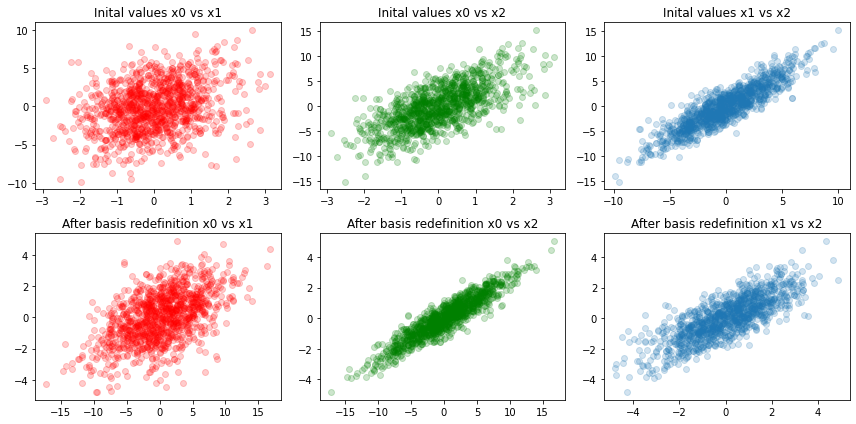

In [3]:
n = np.random.normal(loc=0, scale=0.05, size=(3, N, 10))
x_n = x + np.sum(n, axis = 2)

#Finding the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

cov = np.cov(x_n)
l, V = np.linalg.eig(cov)
l = np.real_if_close(l)
idx = l.argsort()[::-1]
l = l[idx]
V = V[idx]
#print("Eigenvalues:\n", l, '\n')
#print("Eigenvectors:\n", V, '\n')

#Find the eigenvectors and eigenvalues using the SVD.
U, S, Vt = la.svd(x_n)

l_svd = S**2/(N-1)
V_svd = U
l_svd = np.real_if_close(l_svd)
#idx = l_svd.argsort()[::-1]
#l_svd = l_svd[idx]
#V_svd = V_svd[idx]

print("Egienvalues with Eigendecomposition:\n", l)
print("Egienvalues with SVD:\n", l_svd)

print("Eigenvectors with Eigendecomposition:\n", V)
print("Eigenvectors with SVD:\n", V_svd)
#As we can see, the two procedures yield to the same result
print()
#Calculating percent of the total dataset's variability explained by the principal components
Lambda = np.diag(l)
print("By selecting the component 0, we retain %.2f%% of the total variability" % ((Lambda[0, 0]/Lambda.trace())*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % ((Lambda[1, 1]/Lambda.trace())*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % ((Lambda[2, 2]/Lambda.trace())*100))

#The result totally make sense because only the first variable is totally independent from the others, while the 
#others two are strongly correlated to the first one so are not able to retain a large value of the total variability

#Reducing the dimensionality of the system so that at least 99% of the total variability is retained
Lambda_r = np.zeros((Lambda.shape))
var = 0
i = 0
for el in l:
    var = var+el
    Lambda_r[i,i] = el
    if abs((var)/Lambda.trace()) >= 0.99:
        break
    i += 1
#print(Lambda_red)
print("By reducing the dimensionality of the system, we retain %.2f%% of the total variability" % abs(((Lambda_r.trace()*100)/Lambda.trace())))


#Redefining the data according to the new basis from the PCA
Xp = np.dot(V.T, x_n)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(x_n[0], x_n[1], alpha=0.2, c='r')
ax01.set_title('Inital values x0 vs x1')
ax02.scatter(x_n[0], x_n[2], alpha=0.2, c='g')
ax02.set_title('Inital values x0 vs x2')
ax03.scatter(x_n[1], x_n[2], alpha=0.2)
ax03.set_title('Inital values x1 vs x2')

ax11.scatter(Xp[0], Xp[1], alpha=0.2, c='r')
ax11.set_title('After basis redefinition x0 vs x1')
ax12.scatter(Xp[0], Xp[2], alpha=0.2, c='g')
ax12.set_title('After basis redefinition x0 vs x2')
ax13.scatter(Xp[1], Xp[2], alpha=0.2)
ax13.set_title('After basis redefinition x1 vs x2')

plt.tight_layout()
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [4]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 